## Домашнее задание 1
### Выполнил: 
    -> Башаров Илья Валерьевич
    -> ilya.basharov.98@mail.ru

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import (
    LinearRegression,
)
from scipy.stats import multivariate_normal
import seaborn as sns
%matplotlib inline

### Часть 1. О теореме Байеса.

**Задача 1.** Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

**Решение.** Введем обозначения. Событие
* $K$ - обозначающее совпадение группы крови у подсудимого с найденной на месте преступления;
* $B$ - обозначающее виновность подсудимого;
* $N$ - количество жителей в городе, где проводится расследование.

По условию задачи прокурор оценивает вероятность совпадения крови при невиновности:
$$ \mathcal{P}(K|\bar{B}) = \frac{\mathcal{P}(\bar{B}|K)\mathcal{P}(K)}{\mathcal{P}(\bar{B})} $$

Необходимо, исходя изналичия улики, оценить, с какой вероятностью она может быть приобщена к материалам дела:
$$ \mathcal{P}(B|K) = \frac{\mathcal{P}(K|B)\mathcal{P}(B)}{\mathcal{P}(K)} $$

Итак, несмотря на то, что прокурор опирался не те величины, докажем, что на статистические данные по населению опираться также нельзя. Вспомнив определение условной вероятности
$$ \mathcal{P}(K|B) = \frac{\mathcal{P}(K\cap{B})}{\mathcal{P}(B)} $$
выпишем основные вероятности:
* $\mathcal{P}(B) = \frac{1}{N}, \mathcal{P}(\bar{B}) = \frac{N-1}{N}, \mathcal{P}(K) = 0.01$
* $\mathcal{P}(\bar{B}|K) = \frac{\mathcal{P}(\bar{B}\cap{K})}{\mathcal{P}(K)} = \frac{0.01N-1}{N}\frac{N}{0.01N}=\frac{N-100}{N}$
* $\mathcal{P}(K|B) = 1$

Тогда то, что прокурор оценил, и то, что должен оценить, примет вид:
$$\mathcal{P}(K|\bar{B}) = \frac{\mathcal{P}(\bar{B}|K)\mathcal{P}(K)}{\mathcal{P}(\bar{B})} = 0.01\left(1-\frac{99}{N-1}\right)$$
Дополнительный член говорит о том, что чем меньше $N$, тем больше шансов сесть в тюрьму. Но $\displaystyle{\lim_{N \to \infty} \mathcal{P}(K|\bar{B})} = 0.01$. Данное выражение не поддается простому объяснению: кажется, чем больше человек в городе, тем больше имеют ту самую группу крови, значит, выбор предстоит между большим количеством подсудимых.

$$\mathcal{P}(B|K) = \frac{\mathcal{P}(K|B)\mathcal{P}(B)}{\mathcal{P}(K)} = \frac{100}{N}$$
В этом случае все более очевидно. Например, если в городе $N=100$, то только один человек будет иметь схожую группу крови, следовательно, именно он является преступником. Соответственно, когда $N=200$, выбор суда падает на двух человек, значит, вероятность 50/50 и тд.

**Продолжение Задачи 1.** Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

**Решение.** Как известно, главной задачей адвоката является защита подсудимого, т.е. опровержение обвинений. Таким образом, адвокат оценил вероятность виновности при условии совпадения группы крови
$$ \mathcal{P}(B|K) = \frac{\mathcal{P}(K|B)\mathcal{P}(B)}{\mathcal{P}(K)} = \frac{100}{N} $$
а должен был указать суду на невиновность подсудимого
$$ \mathcal{P}(\bar{B}|K) = \frac{\mathcal{P}(K|\bar{B})\mathcal{P}(\bar{B})}{\mathcal{P}(K)} = 1 - \frac{100}{N}$$

Формально, оценил вероятности он правильно, но исключать группу крови из материалов дела нельзя, т.к. вместе с другими даже незначительными доказательствами группа крови может стать решающим фактором в назначении наказания. Но, с другой стороны, адвокат действует очень убедительно и хорошо выполняет свою работу, защищая подсудимого.

**Задача 3.** Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам - на чём лучше сосредоточиться?

**Решение.** Введем обозначения. Событие
* $С^{+}$ - обозначающее реальную болезнь covid19;
* $T^{+}$ - обозначающее положительность теста на covid19.

Тогда ошибки $FN$ и $FP$ соответственно будут иметь вид:
$$ \mathcal{P}(С^{+}|T^{-}) = \frac{\mathcal{P}(T^{-}|С^{+})\mathcal{P}(С^{+})}{\mathcal{P}(T^{-})} = \frac{\mathcal{P}(T^{-}|С^{+})\mathcal{P}(С^{+})}{\mathcal{P}(T^{-}|С^{+})\mathcal{P}(С^{+}) + \mathcal{P}(T^{-}|С^{-})\mathcal{P}(С^{-})} $$
$$ \mathcal{P}(С^{-}|T^{+}) = \frac{\mathcal{P}(T^{+}|С^{-})\mathcal{P}(С^{-})}{\mathcal{P}(T^{+})} = \frac{\mathcal{P}(T^{+}|С^{-})\mathcal{P}(С^{-})}{\mathcal{P}(T^{+}|С^{+})\mathcal{P}(С^{+}) + \mathcal{P}(T^{+}|С^{-})\mathcal{P}(С^{-})} $$
Введя обозначения
$$FNR = \frac{FN}{FN+TP} = \frac{T^{-}|С^{+}}{T^{-}|С^{+} + T^{+}|С^{+}}$$
$$FPR = \frac{FP}{FP+TN} = \frac{T^{+}|С^{-}}{T^{+}|С^{-} + T^{-}|С^{-}}$$
Тогда в новых обозначениях
$$\mathcal{P}(С^{+}|T^{-}) = \frac{\mathcal{P}(С^{+})(1-FNR)}{FPR(1-\mathcal{P}(С^{+}))+(1-FNR)\mathcal{P}(С^{+})}$$
$$\mathcal{P}(С^{-}|T^{+}) = \frac{\mathcal{P}(С^{+})FNR}{(1-\mathcal{P}(С^{+}))(1-FPR)+\mathcal{P}(С^{+})FNR}$$

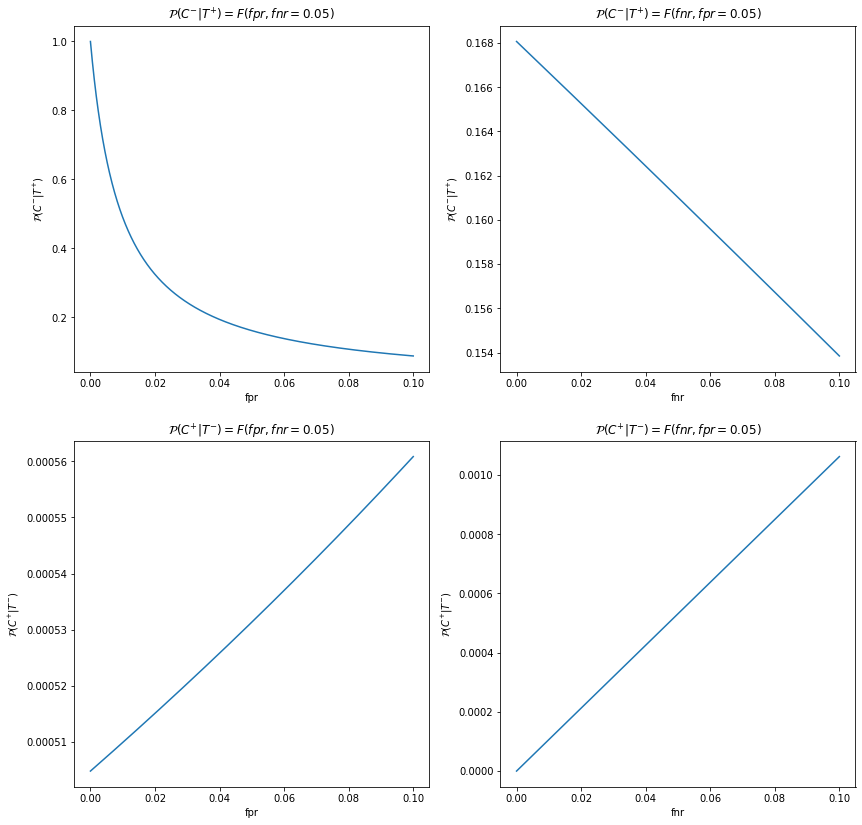

In [2]:
def covid_test(fpr=0.05, fnr=0.05, all_covid=0.01, test=1):
    if test > 0:
        return all_covid * (1 - fnr) / (fpr * (1 - all_covid) + (1 - fnr) * all_covid)
    else:
        return all_covid * fnr / ((1 - fpr) * (1 - all_covid) + fnr * all_covid)
    
fpr = np.linspace(0, 0.1, 1000)
fnr = np.linspace(0, 0.1, 1000)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))

ax1.plot(fpr, covid_test(fpr=fpr, test=1))       
ax1.set_title('$\mathcal{P}(С^{-}|T^{+})=F(fpr, fnr=0.05)$')
ax1.set_xlabel('fpr')
ax1.set_ylabel('$\mathcal{P}(С^{-}|T^{+})$')

ax2.plot(fnr, covid_test(fnr=fnr, test=1))                                            
ax2.set_title('$\mathcal{P}(С^{-}|T^{+})=F(fnr, fpr=0.05)$')
ax2.set_xlabel('fnr')
ax2.set_ylabel('$\mathcal{P}(С^{-}|T^{+})$')

ax3.plot(fpr, covid_test(fpr=fpr, test=0))
ax3.set_title('$\mathcal{P}(С^{+}|T^{-})=F(fpr, fnr=0.05)$')
ax3.set_xlabel('fpr')
ax3.set_ylabel('$\mathcal{P}(С^{+}|T^{-})$')

ax4.plot(fnr, covid_test(fnr=fnr, test=0))
ax4.set_title('$\mathcal{P}(С^{+}|T^{-})=F(fnr, fpr=0.05)$')
ax4.set_xlabel('fnr')
ax4.set_ylabel('$\mathcal{P}(С^{+}|T^{-})$');

Из графиков довольно наглядно видно, что
* уменьшая $FPR$, получаем -[много ложных срабатываний теста], +[незначительное уменьшение невыявленных болезней];
* уменьшая $FNR$, получаем -[больше ложных срабатываний теста], +[более значительное уменьшение невыявленных болезней].

Я считаю, что важнее занизить вероятность невыявленных болезней, поэтому советую **уменьшить FNR.**

### Часть 2. О линейной регрессии

Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей [ссылке](https://covid.ourworldindata.org/data/owid-covid-data.csv).

In [3]:
!wget 'https://covid.ourworldindata.org/data/owid-covid-data.csv' -O covid.csv

--2021-02-27 23:58:44--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.137, 104.21.233.138
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘covid.csv’

covid.csv               [               <=>  ]  17,39M  4,12MB/s    in 4,3s    

2021-02-27 23:58:48 (4,05 MB/s) - ‘covid.csv’ saved [18237453]



**Шаг 1.** Считаем, преобразуем и выведем данные

In [4]:
all_dt = pd.read_csv(
    filepath_or_buffer='covid.csv',
    parse_dates=['date'],
    usecols=lambda col: col not in {'tests_units'}
)

rus_dt = all_dt[
    (all_dt['iso_code'] == 'RUS') & (all_dt['date'] >= '2020-03-03')
].fillna(0)

train_size = 50

rus_ds = {
    'train': {
        'y': rus_dt[:train_size],
        'x': np.arange(0, train_size, 1).reshape(-1, 1),
    },
    'test': {
        'y': rus_dt[train_size:],
        'x': np.arange(train_size, rus_dt.shape[0], 1).reshape(-1, 1),
    },
}

rus_ds['test']['y'].head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52972,RUS,Europe,Russia,2020-04-22,57999.0,5236.0,4787.000,513.0,57.0,45.000,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824
52973,RUS,Europe,Russia,2020-04-23,62773.0,4774.0,4976.429,555.0,42.0,46.143,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824
52974,RUS,Europe,Russia,2020-04-24,68622.0,5849.0,5230.571,615.0,60.0,48.857,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824
52975,RUS,Europe,Russia,2020-04-25,74588.0,5966.0,5399.286,681.0,66.0,52.571,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824
52976,RUS,Europe,Russia,2020-04-26,80949.0,6361.0,5442.286,747.0,66.0,55.143,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.824


**Шаг 2.** Визуализируем данные

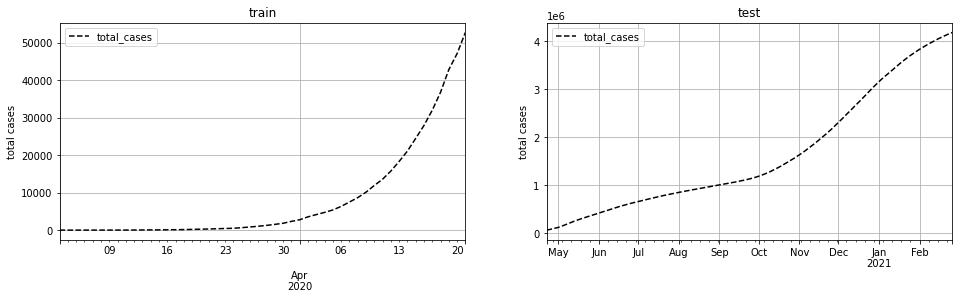

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

for axis, ds_type in zip(
    axes, ['train', 'test']):
    
    rus_ds[ds_type]['y'].plot(
        x='date',
        y='total_cases',
        ax=axis,
        style='k--',
        grid=True,
        legend=True,
        xlabel='',
        ylabel='total cases',
        title=ds_type,
    );

**Шаг 3.1.** Графики показывают, что число заболевших растет экспоненциально. Обучим `LinearRegression` как основную модель и `BayesianRidge` для получения апостериорного распределения.
$$y = e^{(w_{0}+w_{1}{x})} \Rightarrow ln(y) = w_{0}+w_{1}{x}$$

In [6]:
class BayesianRidge:
    
    def __init__(self, mu=np.array([0, 0]), sigma=2*np.array([[1, 0], [0, 1]])):
        self.mu = mu
        self.sigma = sigma
        
    def fit(self, X, y):
        X_ = np.hstack((np.ones((len(X), 1)), X))
    
        alpha = 1 / (y - X_ @ np.linalg.inv(X_.T @ X_) @ X_.T @ y).var()

        sigma_ = np.linalg.inv(np.linalg.inv(self.sigma) + alpha * X_.T @ X_)
        mu_ = sigma_ @ (np.linalg.inv(self.sigma) @ self.mu + alpha * X_.T @ y)
        
        self.sigma = sigma_
        self.mu = mu_
        
    def predict(self, X):
        X_ = np.hstack((np.ones((len(X), 1)), X))
        return X_ @ self.mu

methods = {}
for method, name in zip((LinearRegression, BayesianRidge), ('LinearRegression', 'BayesianRidge')):
    methods[name] = method()
    methods[name].fit(
        rus_ds['train']['x'],
        np.log(rus_ds['train']['y']['total_cases']),
    );

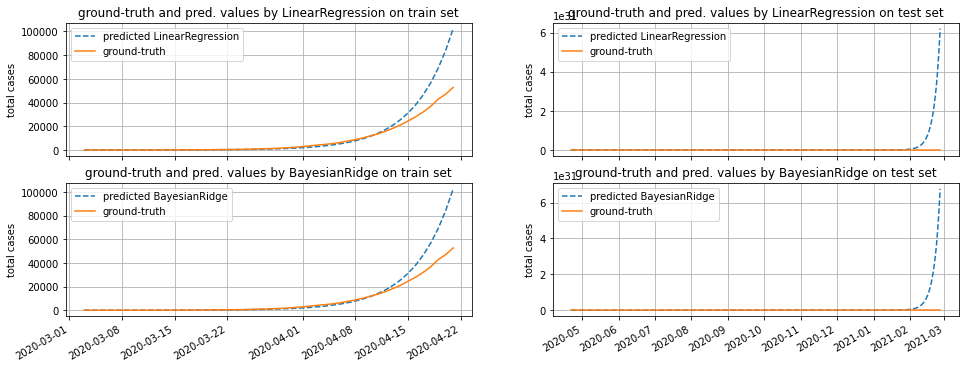

In [7]:
fig, axes2d = plt.subplots(2, 2, figsize=(16, 6))

for axes1d, method in zip(axes2d, methods):
    
    for axis, ds_type in zip(axes1d, rus_ds):
    
        axis.plot(
            rus_ds[ds_type]['y']['date'],
            np.exp(methods[method].predict(rus_ds[ds_type]['x'])),
            linestyle='--',
            label='predicted %s' % method,
        )
        axis.plot(
            rus_ds[ds_type]['y']['date'],
            rus_ds[ds_type]['y']['total_cases'].values,
            linestyle='-',
            label='ground-truth',
        )
        axis.grid() 
        axis.set_ylabel('total cases')
        axis.set_title('ground-truth and pred. values by %s on %s set' % (method, ds_type))
        axis.legend();

plt.gcf().autofmt_xdate()

**Шаг 3.2** Графики показывают, что наши кажущиеся представления об экспоненциальности роста неверны. Точнее, нелья описать все время эпидемии функцией $y=e^{x}$.

Изобразим апостериорное распределение параметров модели.

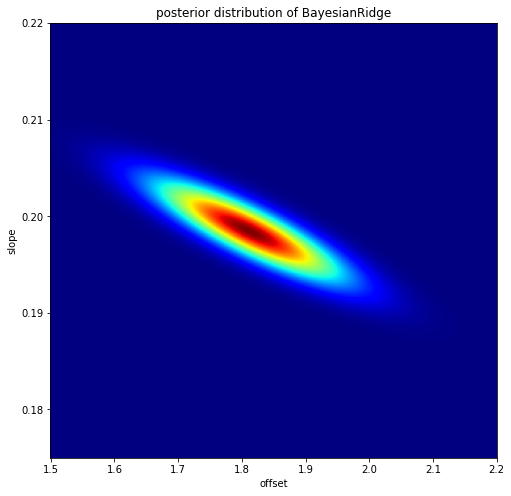

In [8]:
N = 1000
limits = {
    'x': {
        'from': 1.50,
        'to': 2.20,
    },
    'y': {
        'from': 0.175,
        'to': 0.220
    }
}

    
X = np.linspace(limits['x']['from'], limits['x']['to'], N)
Y = np.linspace(limits['y']['from'], limits['y']['to'], N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[..., 0] = X
pos[..., 1] = Y

Z = multivariate_normal.pdf(
    x=pos,
    mean=methods['BayesianRidge'].mu,
    cov=methods['BayesianRidge'].sigma,
)

fig = plt.figure(figsize=(8, 8))
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet, shading='auto');
plt.title('posterior distribution of BayesianRidge');
plt.xlabel('offset');
plt.ylabel('slope');

**Шаг 3.3.** Посэмплируйте много разных экспонент, постройте графики.
* Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая? к 1 июня? к 1 сентября?
* Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [9]:
date_start = '2020-03-03'

for time_pd in ('2020-05-01', '2020-06-01', '2020-09-01'):
    time_delta = (pd.to_datetime(time_pd) - pd.to_datetime(date_start)).days
    print('By %s number of sick people will be %d' % (
        time_pd,
        int(np.exp(methods['LinearRegression'].predict([[time_delta]]))),
    ))

By 2020-05-01 number of sick people will be 744077
By 2020-06-01 number of sick people will be 347723874
By 2020-09-01 number of sick people will be 29104907396230516


In [10]:
def myplot_sample_lines(ds, mu, sigma, n=20, points=None, axis=None):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    
    samples = {
        'train': [],
        'test': [],
    }
    
    for w in my_w:
        for ds_type in ds:
            samples[ds_type].append(np.exp(w[0] + w[1]*ds[ds_type]['x']))
        axis.plot(ds['train']['x'], samples['train'][-1], 'k-', lw=.4)
        
    if not points is None:
        axis.scatter(points[0], points[1], marker='*', s=200)
        
    for ds_type in ds:
        samples[ds_type] = np.array(samples[ds_type]).mean(axis=1)
        
    return samples

Predicted value at 10 percentile at test set is 260225010237875201622990127104.000000
Predicted value at 90 percentile at test set is 4097190009958405544574743216128.000000


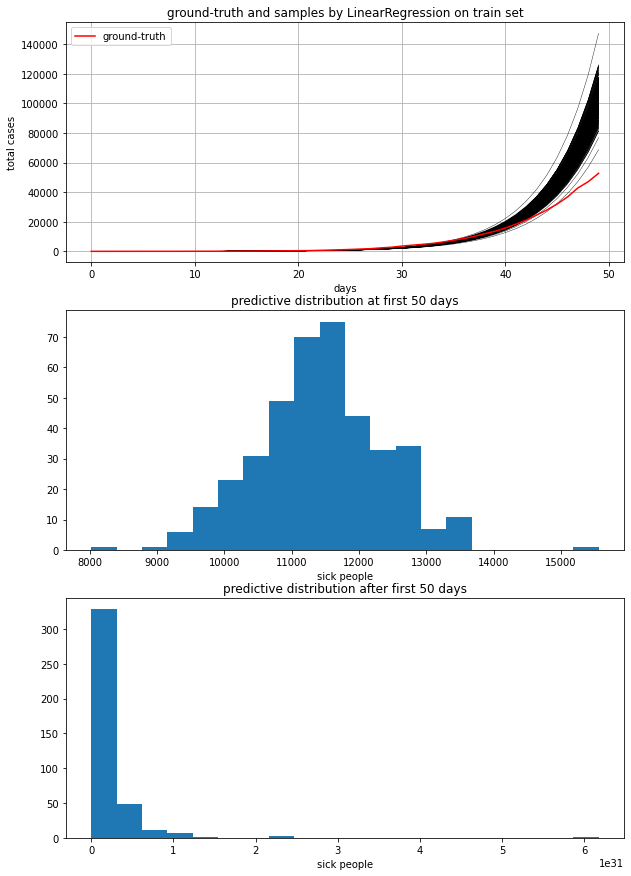

In [11]:
fig, axes1d = plt.subplots(3, 1, figsize=(10, 15))

samples = myplot_sample_lines(
    rus_ds,
    methods['BayesianRidge'].mu,
    methods['BayesianRidge'].sigma,
    n = 400,
    axis=axes1d[0],
)

axes1d[0].plot(
    rus_ds['train']['x'],
    rus_ds['train']['y']['total_cases'].values,
    linestyle='-',
    color='red',
    label='ground-truth',
);
axes1d[0].grid();
axes1d[0].set_xlabel('days');
axes1d[0].set_ylabel('total cases');
axes1d[0].set_title('ground-truth and samples by %s on %s set' % ('LinearRegression', 'train'));
axes1d[0].legend();

for i, ds_type in enumerate(samples):
    axes1d[i+1].hist(samples[ds_type], bins=20);
    axes1d[i+1].set_xlabel('sick people');
    axes1d[i+1].set_title('predictive distribution %s first 50 days' % ('at' if ds_type=='train' else 'after'));

for percentile in (10, 90):
    print('Predicted value at %d percentile at test set is %f' % (
        percentile, np.percentile(samples['test'], percentile))
    )

**Шаг 4.** Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.
**Решение.** Мы имеем переменную в датасете `new_cases`. По сути, верно равенство:
$$ totalCases[i] = \sum_{k=0}^{k=i}newCases$$
Значит, в какой то степени, `new_cases` является аккумулятором `total_cases`, значит, попробуем использовать
$$totalCases(x) = \int_{0}^{x}newCases(k)dk$$
Вспомнив выражение функции ошибок, с помощью которой мы хотим приблизить данные
$$\Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{\frac{-t^2}{2}}dt$$
мы получаем важное предположение: если `new_cases` нормально зависит от номера дня пандемии, то пазл соберется воедино. То есть, если $newCases(x) \approx e^{ax^2+bx+c}$, то наш искуственный интеграл приобретает форму `total_cases`. Таким образом, получаем линейную регрессию: 
$$\ln{\left(newCases\right)} =a*{day}^2 + b*{day} + c$$

In [ ]:
methods = {}
for method, name in zip((LinearRegression, BayesianRidge), ('LinearRegression', 'BayesianRidge')):
    if name == 'BayesianRidge':
        methods[name] = method(np.array([0, 0, 0]), np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]))
    else:
        methods[name] = method()
    methods[name].fit(
        np.array([rus_ds['train']['x'], (rus_ds['train']['x']) ** 2]).T.squeeze(0),
        np.log(rus_ds['train']['y']['total_cases']),
    );

fig, axes2d = plt.subplots(2, 2, figsize=(16, 6))

for axes1d, method in zip(axes2d, methods):
    
    for axis, ds_type in zip(axes1d, rus_ds):
    
        axis.plot(
            rus_ds[ds_type]['y']['date'],
            np.exp(methods[method].predict(rus_ds[ds_type]['x'])),
            linestyle='--',
            label='predicted %s' % method,
        )
        axis.plot(
            rus_ds[ds_type]['y']['date'],
            rus_ds[ds_type]['y']['total_cases'].values,
            linestyle='-',
            label='ground-truth',
        )
        axis.grid() 
        axis.set_ylabel('total cases')
        axis.set_title('ground-truth and pred. values by %s on %s set' % (method, ds_type))
        axis.legend();

plt.gcf().autofmt_xdate()